In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

In [6]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
##print(url)

In [10]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | albany
Processing Record 2 of Set 13 | nishihara
Processing Record 3 of Set 13 | ushuaia
Processing Record 4 of Set 13 | yabucoa
Processing Record 5 of Set 13 | ribeira grande
Processing Record 6 of Set 13 | hilo
Processing Record 7 of Set 13 | ketchikan
Processing Record 8 of Set 13 | xingyi
Processing Record 9 of Set 13 | hobart
Processing Record 10 of Set 13 | punta arenas
Processing Record 11 of Set 13 | ganzhou
Processing Record 12 of Set 13 | norman wells
Processing Record 13 of Set 13 | ust-nera
Processing Record 14 of Set 13 | palabuhanratu
City not found. Skipping...
Processing Record 15 of Set 13 | ponta do sol
Processing Record 16 of Set 13 | ambulu
Processing Record 17 of Set 13 | kaeo
Processing Record 18 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 19 of Set 13 | belushya guba
City not found. Skipping...
Processing Record 20 of Set 13 | bluff
Processing Record 21 of Set 13 | portland
Processing Record 22 of Set 13 | a

Processing Record 33 of Set 16 | caluquembe
Processing Record 34 of Set 16 | san rafael del sur
Processing Record 35 of Set 16 | mount gambier
Processing Record 36 of Set 16 | iqaluit
Processing Record 37 of Set 16 | avera
Processing Record 38 of Set 16 | zhigansk
Processing Record 39 of Set 16 | banikoara
Processing Record 40 of Set 16 | luganville
Processing Record 41 of Set 16 | ilinsko-podomskoye
City not found. Skipping...
Processing Record 42 of Set 16 | khatanga
Processing Record 43 of Set 16 | karauzyak
City not found. Skipping...
Processing Record 44 of Set 16 | port shepstone
Processing Record 45 of Set 16 | asau
Processing Record 46 of Set 16 | namibe
Processing Record 47 of Set 16 | harnosand
Processing Record 48 of Set 16 | port keats
Processing Record 49 of Set 16 | balkanabat
Processing Record 50 of Set 16 | cockburn town
Processing Record 1 of Set 17 | acapulco
Processing Record 2 of Set 17 | ruatoria
City not found. Skipping...
Processing Record 3 of Set 17 | sremcica


Processing Record 14 of Set 20 | port augusta
Processing Record 15 of Set 20 | hunza
City not found. Skipping...
Processing Record 16 of Set 20 | sambava
Processing Record 17 of Set 20 | teeli
Processing Record 18 of Set 20 | port hardy
Processing Record 19 of Set 20 | sovetskiy
Processing Record 20 of Set 20 | sao gabriel da cachoeira
Processing Record 21 of Set 20 | rudbar
Processing Record 22 of Set 20 | verin
Processing Record 23 of Set 20 | vanimo
Processing Record 24 of Set 20 | methala
Processing Record 25 of Set 20 | flinders
Processing Record 26 of Set 20 | sao geraldo do araguaia
Processing Record 27 of Set 20 | tasiilaq
Processing Record 28 of Set 20 | marystown
Processing Record 29 of Set 20 | temeni
Processing Record 30 of Set 20 | anloga
Processing Record 31 of Set 20 | susanville
Processing Record 32 of Set 20 | sinnamary
Processing Record 33 of Set 20 | pangnirtung
Processing Record 34 of Set 20 | porto novo
Processing Record 35 of Set 20 | wolmaranstad
City not found. 

Processing Record 48 of Set 23 | santos dumont
Processing Record 49 of Set 23 | vostok
Processing Record 50 of Set 23 | himora
City not found. Skipping...
Processing Record 1 of Set 24 | lodja
Processing Record 2 of Set 24 | kavaratti
Processing Record 3 of Set 24 | mocuba
Processing Record 4 of Set 24 | massaguet
Processing Record 5 of Set 24 | carahue
Processing Record 6 of Set 24 | challapata
Processing Record 7 of Set 24 | bereda
Processing Record 8 of Set 24 | tamiahua
Processing Record 9 of Set 24 | garowe
Processing Record 10 of Set 24 | rascani
City not found. Skipping...
Processing Record 11 of Set 24 | antofagasta
Processing Record 12 of Set 24 | xining
Processing Record 13 of Set 24 | manitouwadge
Processing Record 14 of Set 24 | romny
Processing Record 15 of Set 24 | okakarara
Processing Record 16 of Set 24 | salinas
Processing Record 17 of Set 24 | manaure
Processing Record 18 of Set 24 | el tigre
Processing Record 19 of Set 24 | holice
Processing Record 20 of Set 24 | tra

In [12]:
len(city_data)

563

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,56.75,46,1,1.68,US,2021-11-07 19:37:04
1,Nishihara,26.1842,127.7558,73.45,76,20,8.05,JP,2021-11-07 19:42:01
2,Ushuaia,-54.8000,-68.3000,47.86,61,40,19.57,AR,2021-11-07 19:42:01
3,Yabucoa,18.0505,-65.8793,87.69,79,21,6.26,PR,2021-11-07 19:42:02
4,Ribeira Grande,38.5167,-28.7000,70.20,88,75,20.71,PT,2021-11-07 19:42:02
5,Hilo,19.7297,-155.0900,91.27,84,75,4.61,US,2021-11-07 19:42:03
6,Ketchikan,55.3422,-131.6461,39.67,93,75,0.00,US,2021-11-07 19:42:03
7,Xingyi,24.1877,102.8170,48.69,90,97,5.91,CN,2021-11-07 19:42:04
8,Hobart,-42.8794,147.3294,51.12,83,90,0.00,AU,2021-11-07 19:37:34
9,Punta Arenas,-53.1500,-70.9167,53.71,43,20,27.63,CL,2021-11-07 19:40:11


In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

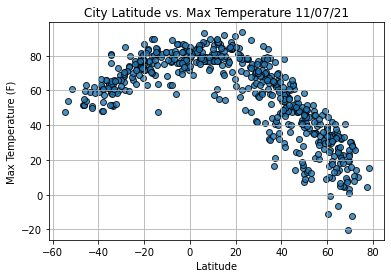

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

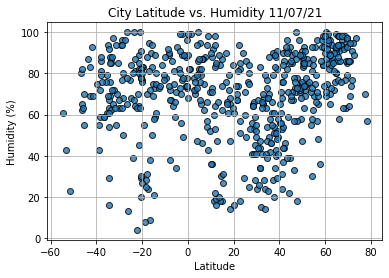

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

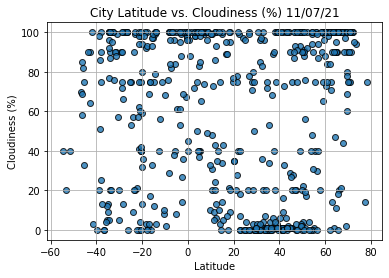

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

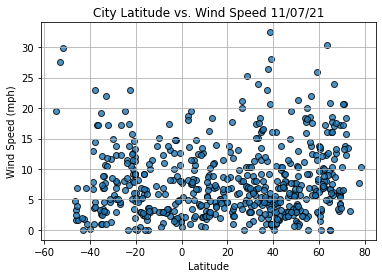

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
index13 = city_data_df.loc[13]
index13

City                 Ponta Do Sol
Country                        PT
Date          2021-11-07 19:42:04
Lat                       32.6667
Lng                         -17.1
Max Temp                    66.83
Humidity                       65
Cloudiness                      4
Wind Speed                   6.71
Name: 13, dtype: object

In [24]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3       True
4       True
       ...  
558     True
559    False
560     True
561     True
562    False
Name: Lat, Length: 563, dtype: bool

In [25]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2021-11-07 19:37:04,42.6001,-73.9662,56.75,46,1,1.68
1,Nishihara,JP,2021-11-07 19:42:01,26.1842,127.7558,73.45,76,20,8.05
3,Yabucoa,PR,2021-11-07 19:42:02,18.0505,-65.8793,87.69,79,21,6.26
4,Ribeira Grande,PT,2021-11-07 19:42:02,38.5167,-28.7000,70.20,88,75,20.71
5,Hilo,US,2021-11-07 19:42:03,19.7297,-155.0900,91.27,84,75,4.61
...,...,...,...,...,...,...,...,...,...
556,Lebanon,US,2021-11-07 19:54:20,36.2081,-86.2911,65.66,46,1,4.61
557,Misratah,LY,2021-11-07 19:56:17,32.3754,15.0925,75.24,63,36,15.03
558,Gigmoto,PH,2021-11-07 19:56:18,13.7796,124.3900,79.92,89,100,8.86
560,Male,MV,2021-11-07 19:56:18,4.1748,73.5089,84.15,79,75,19.57


In [26]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2021-11-07 19:37:04,42.6001,-73.9662,56.75,46,1,1.68
1,Nishihara,JP,2021-11-07 19:42:01,26.1842,127.7558,73.45,76,20,8.05
3,Yabucoa,PR,2021-11-07 19:42:02,18.0505,-65.8793,87.69,79,21,6.26
4,Ribeira Grande,PT,2021-11-07 19:42:02,38.5167,-28.7000,70.20,88,75,20.71
5,Hilo,US,2021-11-07 19:42:03,19.7297,-155.0900,91.27,84,75,4.61


In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

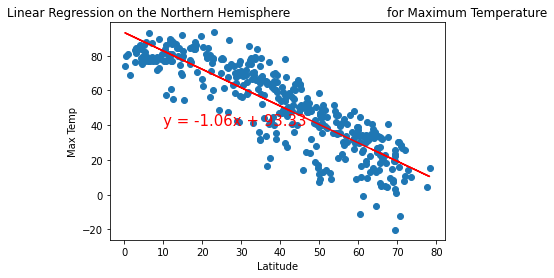

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

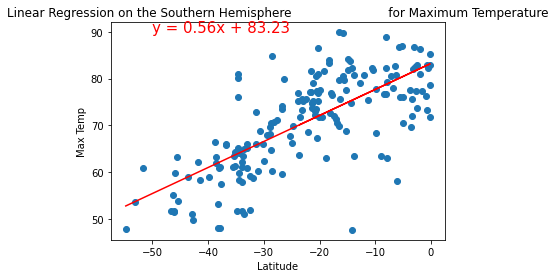

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

In [32]:
# May need to switch x and y
linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

LinregressResult(slope=0.5552451023501056, intercept=83.22600716533897, rvalue=0.7219629327369205, pvalue=4.053396641002162e-30, stderr=0.03999875295962069, intercept_stderr=1.0379502151910256)

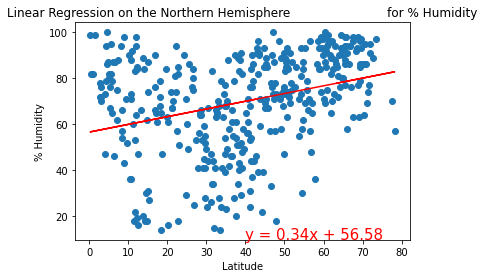

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

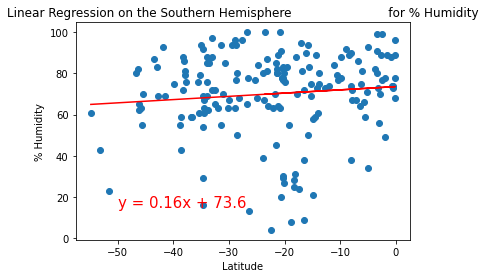

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

In [35]:
# May need to switch x and y
linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

LinregressResult(slope=0.15769342079435159, intercept=73.59733380317364, rvalue=0.10143086167250283, pvalue=0.17668509954501385, stderr=0.11625488101562395, intercept_stderr=3.0167635198274505)

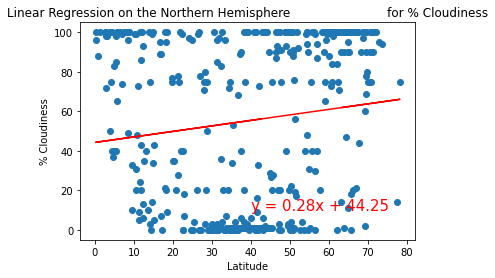

In [36]:
# 6.4.4 Skill Drill - Refactor the code we have been using for linear regression lines and plots to create the x- and y-values for the percent cloudiness and latitudes on the Northern Hemisphere DataFrame.
# Call the plot_linear_regression function with the correct arguments to create the linear regression line and plot for percent cloudiness in the Northern Hemisphere. It should look like the following plot.  
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

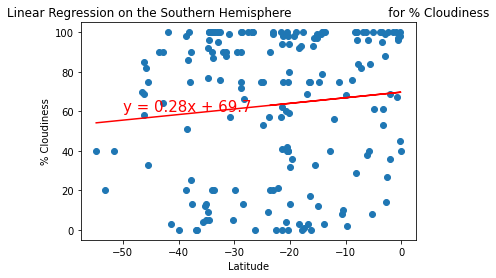

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

In [38]:
# May need to switch x and y
linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

LinregressResult(slope=0.28330997904140226, intercept=69.70116049770277, rvalue=0.10394160629516451, pvalue=0.1661580264652494, stderr=0.20376379557860425, intercept_stderr=5.2875817324220415)

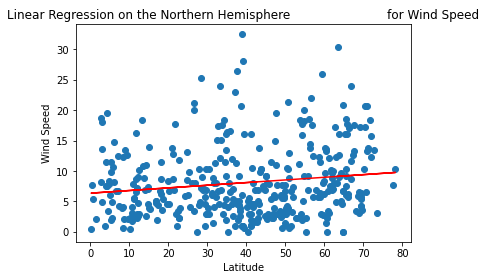

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

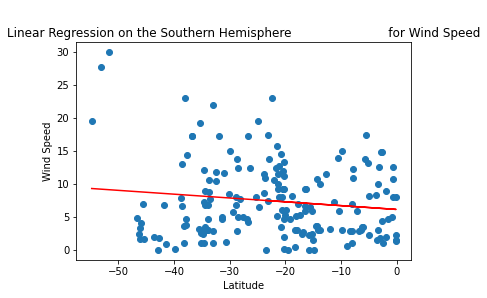

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [43]:
# May need to switch x and y
linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

LinregressResult(slope=-0.05782878334620259, intercept=6.126593302046326, rvalue=-0.1344957821256269, pvalue=0.07265545147263994, stderr=0.03202467967795068, intercept_stderr=0.8310264871684588)